Welkom to the notebook of **bnlearn**!



**bnlearn** is Python package for *learning the graphical structure of Bayesian networks*, *parameter learning*, *inference* and *sampling methods*. The aim is to easily build probabilistic graphical models and pipelines.


**Learning a Bayesian network can be split into:**
  * Structure learning: Given a set of data samples, estimate a DAG that captures the dependencies between the variables.
  * Parameter learning: Given a set of data samples and a DAG that captures the dependencies between the variables, estimate the (conditional) probability distributions of the individual variables.
  * Inferences: Compute probabilities given the CPD and DAG.

**More information:**
* [API documentations](https://erdogant.github.io/bnlearn/)
* [Github](https://github.com/erdogant/bnlearn)
* [Medium Blog Structure learning](https://towardsdatascience.com/a-step-by-step-guide-in-detecting-causal-relationships-using-bayesian-structure-learning-in-python-c20c6b31cee5)
* [Medium Blog Knowledge driven models](https://towardsdatascience.com/a-step-by-step-guide-in-designing-knowledge-driven-models-using-bayesian-theorem-7433f6fd64be)


**Installation of libraries**

In [2]:
# Install bnlearn
!pip install -U bnlearn

# Install d3blocks
!pip install d3blocks

# Install from github source
#!pip install -U git+https://github.com/erdogant/bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/erdogant/bnlearn to /tmp/pip-req-build-powo6ho9
  Running command git clone --filter=blob:none --quiet https://github.com/erdogant/bnlearn /tmp/pip-req-build-powo6ho9
  Resolved https://github.com/erdogant/bnlearn to commit 6482efd549a3d6556497bfc5f67055d4ca136eb8
  Preparing metadata (setup.py) ... done
  Using cached pgmpy-0.1.22-py3-none-any.whl (1.9 MB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached ismember-1.0.2-py3-none-any.whl (7.5 kB)
  Using cached funcsigs-1.0.2-py2.py3-none-any.whl (17 kB)
  Using cached df2onehot-1.0.3-py3-none-any.whl (14 kB)
  Using cached pypickle-1.1.0-py3-none-any.whl (5.1 kB)
  Using cached wget-3.2-py3-none-any.whl
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for bnlearn: filename=bnlearn-0.7.16-py3-none-any.whl size=65544 sha256=25

In [1]:
# Version matplotlib should be >= 3.3.4
import matplotlib
print(matplotlib.__version__)

import pandas as pd
import numpy as np

# Version pgmpy should be >= 0.1.13
import pgmpy
print(pgmpy.__version__)

# Latest version bnlearn
import bnlearn as bn
print(bn.__version__)

3.7.1
0.1.22
0.7.16


**Structure learning example**

In [2]:
# Example dataframe sprinkler_data.csv can be loaded with: 
df = bn.import_example()
# df = pd.read_csv('sprinkler_data.csv')
model = bn.structure_learning.fit(df)


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


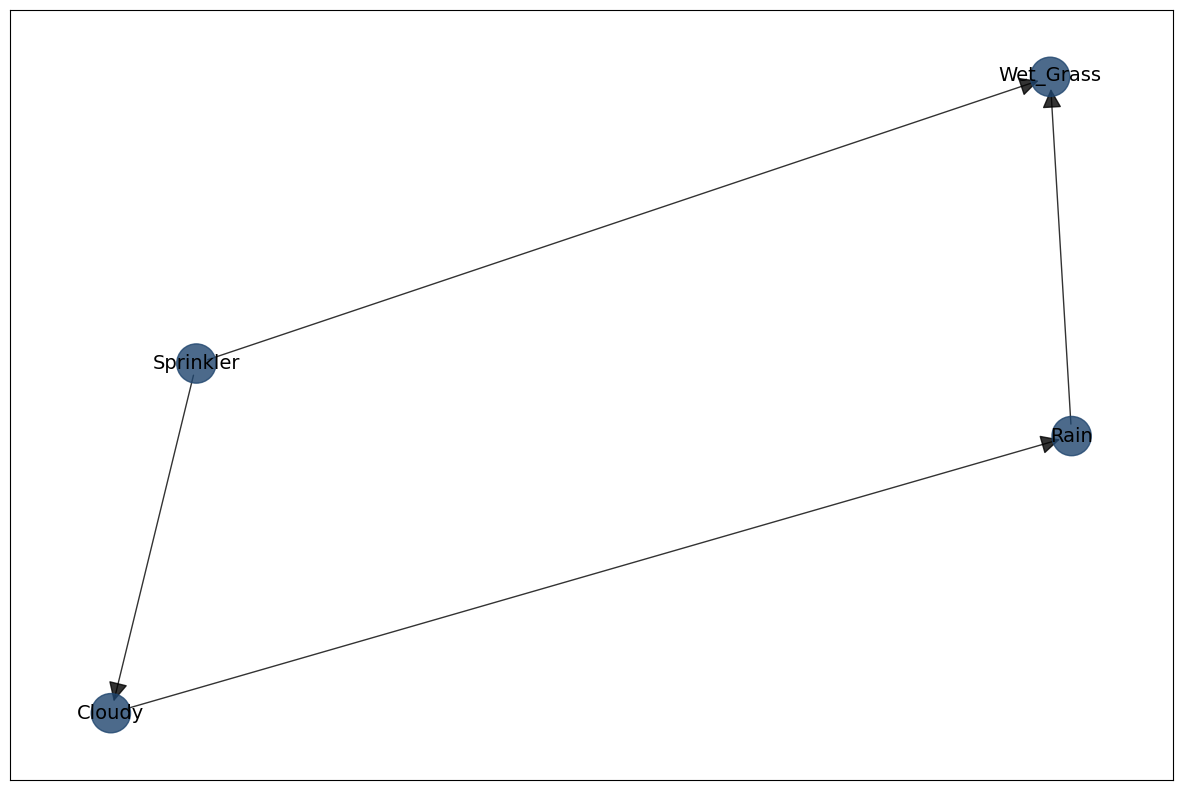

In [3]:
G = bn.plot(model)

In [6]:
# Set some colors to the edges and nodes
node_properties = bn.get_node_properties(model)
node_properties['Sprinkler']['node_color']='#FF0000'

edge_properties = bn.get_edge_properties(model)

edge_properties[('Cloudy', 'Rain')]['color']='#FF0000'
edge_properties[('Cloudy', 'Rain')]['weight']=5

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


In [10]:
G = bn.plot(model,
            node_properties=node_properties,
            edge_properties=edge_properties,
            interactive=True,
            params_interactive={'notebook':True})

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 4
[d3blocks] >INFO> Slider range is set to [0, 5]
[d3blocks] >INFO> Write to path: [/tmp/tmp_fytyffi/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmp_fytyffi/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 4
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 5]
[d3blocks] >INFO> Write to path: [/tmp/tmpds_3ymwh/bnlearn_causal_network.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmpds_3ymwh/bnlearn_causal_network.html]


**Various methodtypes and scoringtypes**

In [11]:
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='cl', root_node='Cloudy')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/6.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


Parameter Learning

In [12]:
# Import dataframe
df = bn.import_example()
# As an example we set the CPD at False which returns an "empty" DAG
model = bn.import_DAG('sprinkler', CPD=False)
# Now we learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df)
# Make plot
#G = bn.plot(model_update)
G = bn.plot(model_update,
            interactive=True,
            params_interactive={'notebook':True, 'cdn_resources': 'remote'})


[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 4
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/tmp/tmpvohpxca7/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmpvohpxca7/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 4
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 1]


[bnlearn] >Import <sprinkler>
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Cloudy:
+-----------+-------+
| Cloudy(0) | 0.494 |
+-----------+-------+
| Cloudy(1) | 0.506 |
+-----------+-------+
[bnlearn] >CPD of Sprinkler:
+--------------+--------------------+--------------------+
| Cloudy       | Cloudy(0)          | Cloudy(1)          |
+--------------+--------------------+--------------------+
| Sprinkler(0) | 0.4807692307692308 | 0.7075098814229249 |
+--------------+--------------------+--------------------+
| Sprinkler(1) | 0.5192307692307693 | 0.2924901185770751 |
+--------------+--------------------+--------------------+
[bnlearn] >CPD of Rain:
+---------+--------------------+---------------------+
| Cloudy  | Cloudy(0)          | Cloudy(1)           |
+---------+--------------------+---------------------+
| Rain(0) | 0.6518218623481782 | 0.33695652173913043 |
+---------+--------------------+---------------------+
| Rain(1) | 0.3481781376518

[d3blocks] >INFO> Write to path: [/tmp/tmpjakw2tbr/bnlearn_causal_network.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmpjakw2tbr/bnlearn_causal_network.html]


**Inferences**

In [13]:
model = bn.import_DAG('sprinkler')
q_1 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1,'Sprinkler':0, 'Wet_Grass':1})
q_2 = bn.inference.fit(model, variables=['Rain'], evidence={'Cloudy':1})

[bnlearn] >Import <sprinkler>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 |   0 |
+----+--------+-----+
|  1 |      1 |   1 |
+----+--------+-----+
[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 | 0.2 |
+----+--------+-----+
|  1 |      1 | 0.8 |
+----+--------+-----+


In [14]:
print(dir(q_2))
print(q_2.df)

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__truediv__', '__weakref__', '_str', 'add_state_names', 'assignment', 'cardinality', 'copy', 'del_state_names', 'df', 'divide', 'get_cardinality', 'get_state_names', 'get_state_no', 'get_value', 'identity_factor', 'is_valid_cpd', 'marginalize', 'maximize', 'name_to_no', 'no_to_name', 'normalize', 'product', 'reduce', 'sample', 'scope', 'set_value', 'state_names', 'store_state_names', 'sum', 'values', 'variables']
   Rain    p
0     0  0.2
1     1  0.8


**Sampling**

In [15]:
model = bn.import_DAG('sprinkler')
df = bn.sampling(model, n=1000)

[bnlearn] >Import <sprinkler>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


**Comparing networks**

[bnlearn] >Import <asia>
[bnlearn] >Loading bif file </usr/local/lib/python3.10/dist-packages/datazets/data/asia.bif>
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


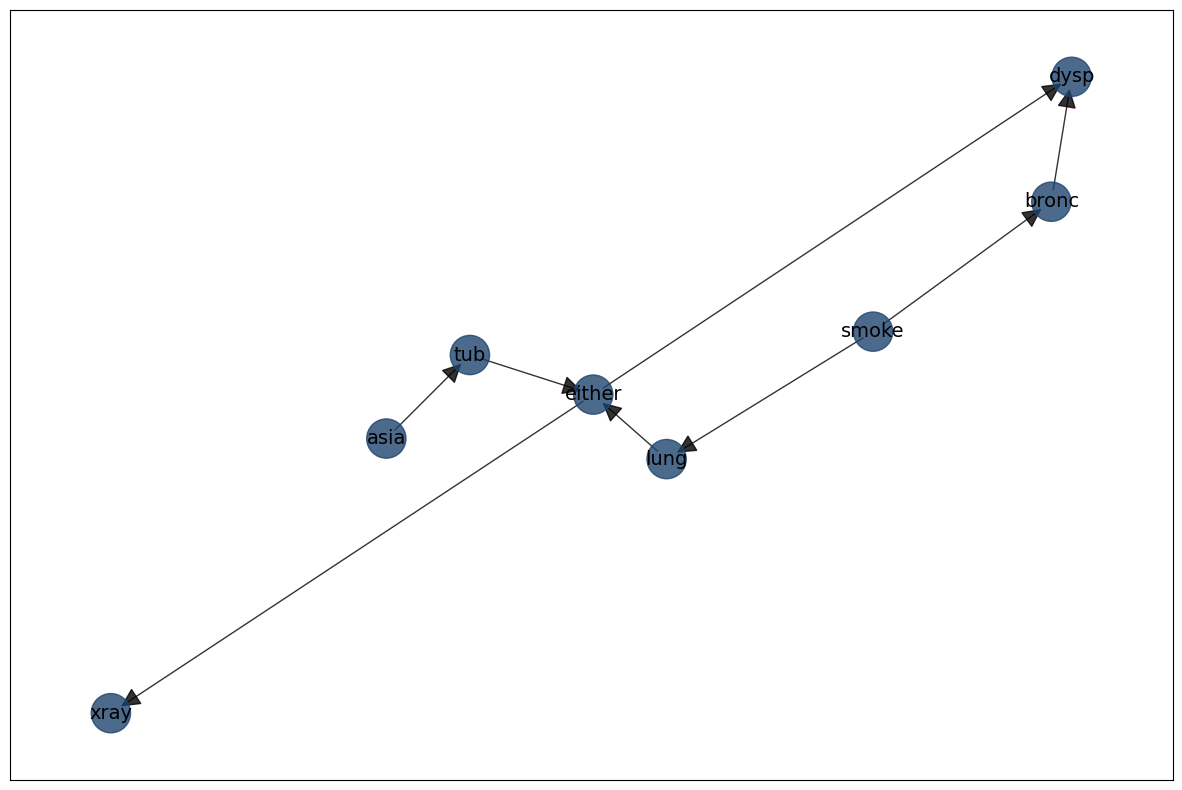

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Existing coordinates from <pos> are used.


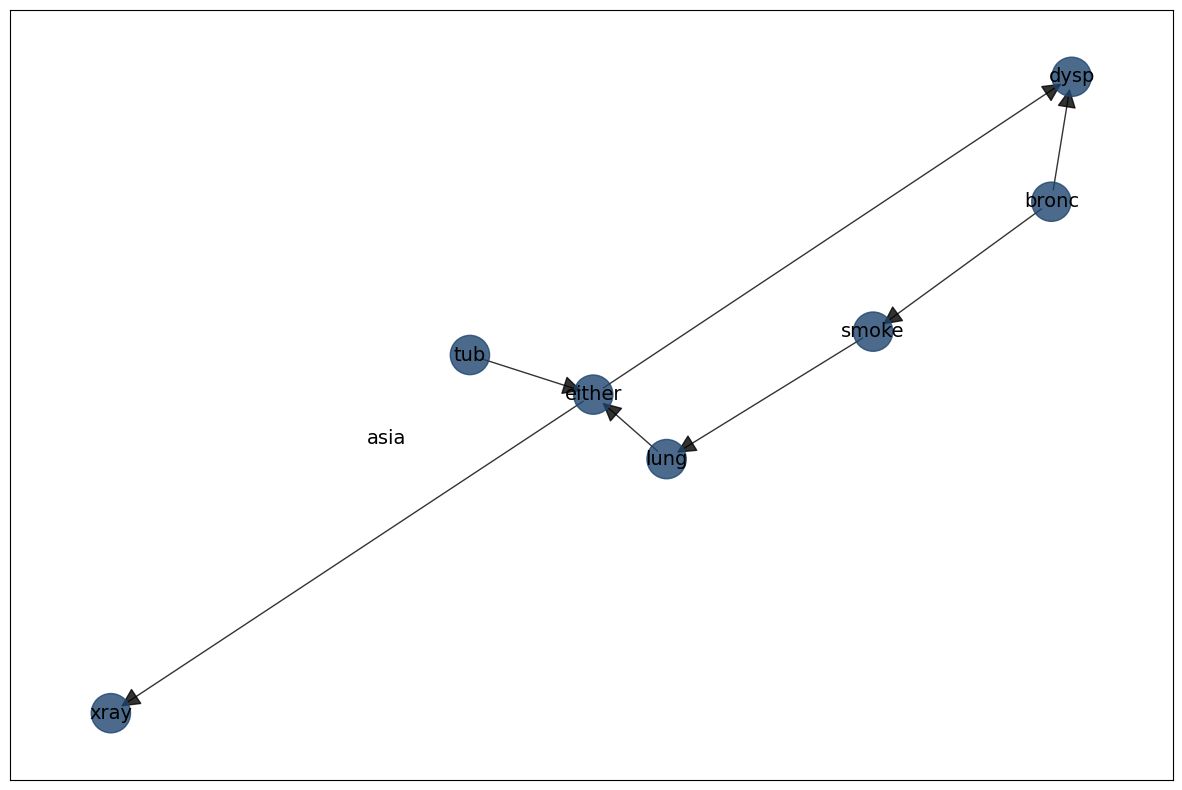

[bnlearn] >Existing coordinates from <pos> are used.


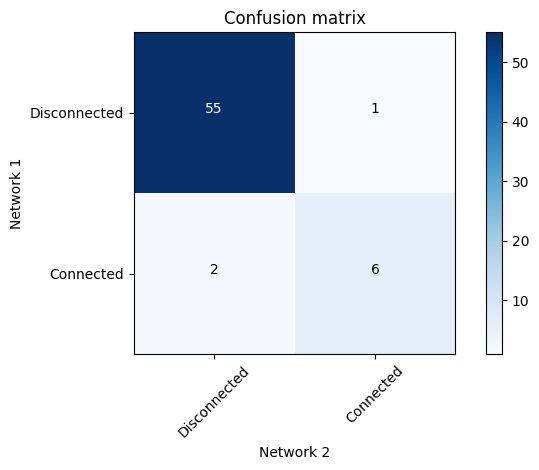

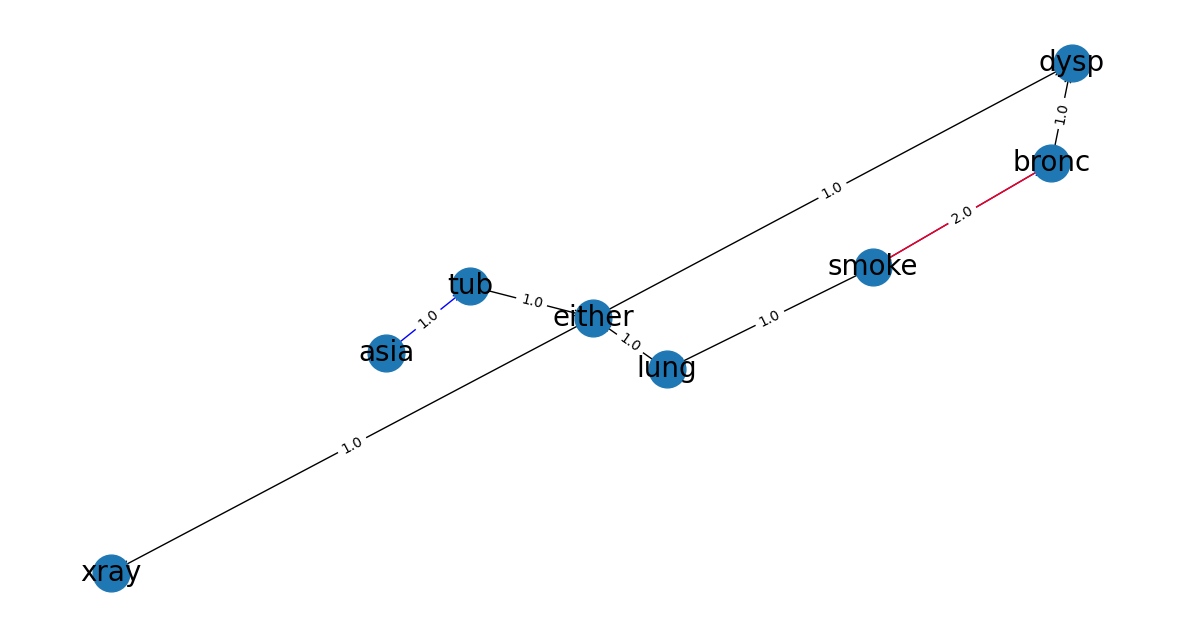

(array([[55,  1],
        [ 2,  6]]),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     0
 smoke      0    0      0     1     -1       0     0     0
 lung       0    0      0     0      0       1     0     0
 bronc      0    0      2     0      0       0     0     1
 either     0    0      0     0      0       0     1     1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [16]:
# Load asia DAG
model = bn.import_DAG('asia')
# plot ground truth
G = bn.plot(model, interactive=False)
# Sampling
df = bn.sampling(model, n=10000)
# Structure learning of sampled dataset
model_sl = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
# Plot based on structure learning of sampled data
bn.plot(model_sl, pos=G['pos'])

# Compare networks and make plot
bn.compare_networks(model, model_sl, pos=G['pos'])

**Loading example DAG files**

Note that some of the CPDs do not add up to exactly 1. This will raise an error that needs to be fixed in the input file. As an example, the **asia** works correctly but when you try **pathfinder** throws the error: "*>Warning: CPD [Fault] does not add up to 1 but is: 1.00000003*". You need to make sure that it exactly sums up to 1.

In [17]:
bif_file= 'sprinkler'
bif_file= 'alarm'
bif_file= 'andes'
bif_file= 'asia'
#bif_file= 'pathfinder'
#bif_file= 'sachs'
#bif_file= 'miserables'
#bif_file= 'filepath/to/model.bif'

# Loading example dataset
model = bn.import_DAG(bif_file, verbose=1)



---



---



### Example to learn structure in dataset that start with source-target and the weights.

The weights can be counts how often two edges were detected.

In [18]:
raw = bn.import_example('stormofswords')
# Convert raw data into sparse datamatrix
df = bn.vec2df(raw['source'], raw['target'], raw['weight'])


In [19]:
print(df.head())

   Aegon  Aemon  Aerys  Alliser  Amory  Anguy   Arya  Balon  Barristan  \
0  False   True  False    False  False  False  False  False      False   
1  False   True  False    False  False  False  False  False      False   
2  False   True  False    False  False  False  False  False      False   
3  False   True  False    False  False  False  False  False      False   
4  False   True  False    False  False  False  False  False      False   

   Belwas  ...  Tommen  Tyrion  Tywin    Val  Varys  Viserys  Walder  Walton  \
0   False  ...   False   False  False  False  False    False   False   False   
1   False  ...   False   False  False  False  False    False   False   False   
2   False  ...   False   False  False  False  False    False   False   False   
3   False  ...   False   False  False  False  False    False   False   False   
4   False  ...   False   False  False  False  False    False   False   False   

    Worm  Ygritte  
0  False    False  
1  False    False  
2  False    Fa

In [20]:
# Make the actual Bayesian DAG
DAG = bn.make_DAG(list(zip(raw['source'], raw['target'])), verbose=0)
# Make plot
G=bn.plot(DAG,
          interactive=True,
          params_interactive={'notebook':True, 'cdn_resources': 'remote', 'filter_menu': True, 'select_menu': True})

# You will see that this is a huge network with hundreds of edges.

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 107
[d3blocks] >INFO> Slider range is set to [0, 1]


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Write to path: [/tmp/tmpxbz8b3si/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmpxbz8b3si/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 107
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 1]
[d3blocks] >INFO> Write to path: [/tmp/tmphtv67_ed/bnlearn_causal_network.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmphtv67_ed/bnlearn_causal_network.html]


In [21]:
# Parameter learning
model = bn.parameter_learning.fit(DAG, df, verbose=3)
# All the CPDs are now learned 

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Aemon:
+--------------+-----+---------------+
| Jon          | ... | Jon(True)     |
+--------------+-----+---------------+
| Robert       | ... | Robert(True)  |
+--------------+-----+---------------+
| Stannis      | ... | Stannis(True) |
+--------------+-----+---------------+
| Aemon(False) | ... | 0.5           |
+--------------+-----+---------------+
| Aemon(True)  | ... | 0.5           |
+--------------+-----+---------------+
[bnlearn] >CPD of Grenn:
+--------------+-----+----------------+---------------+
| Aemon        | ... | Aemon(True)    | Aemon(True)   |
+--------------+-----+----------------+---------------+
| Eddison      | ... | Eddison(True)  | Eddison(True) |
+--------------+-----+----------------+---------------+
| Jon          | ... | Jon(True)      | Jon(True)     |
+--------------+-----+----------------+---------------+
| Samwell      | ... | Samwell(False) | Samwell(True) |
+------

In [22]:
# Generate some data based on DAG
# df1 = bn.sampling(model, n=1000)
# Make predictions
# print(query)
query = bn.inference.fit(DAG, variables=['Grenn'], evidence={'Aemon': 1, 'Samwell': 1})
print(query)
query.df

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    | Grenn   |        p |
+====+=========+==========+
|  0 | False   | 0.578207 |
+----+---------+----------+
|  1 | True    | 0.421793 |
+----+---------+----------+
+--------------+--------------+
| Grenn        |   phi(Grenn) |
+==============+==============+
| Grenn(False) |       0.5782 |
+--------------+--------------+
| Grenn(True)  |       0.4218 |
+--------------+--------------+


,Grenn,p
0,False,0.578207
1,True,0.421793


In [23]:
# Structure learning on such a huge network will take a lot of time, and with some methods it may even be impossible to compute. 
# Lets try to learn it structure for a smaller subset of the columns.
DAG_learned = bn.structure_learning.fit(df.iloc[:, 0:20])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [24]:
# Keep only significant edges
DAG_learned = bn.independence_test(DAG_learned, df, prune=True)

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [Bran <-> Brynden] [P=0.0519475] is excluded because it was not significant (P<0.05) with [chi_square]


In [25]:
# Plot the edges for the small network
_ = bn.plot(DAG_learned,
            interactive=True,
            params_interactive={'notebook':True, 'cdn_resources': 'remote', 'filter_menu': True, 'select_menu': True})

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Set directed=True to see the markers!
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Number of unique nodes: 12
[d3blocks] >INFO> Slider range is set to [0, 10]
[d3blocks] >INFO> Write to path: [/tmp/tmp9detd1uf/d3graph.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmp9detd1uf/d3graph.html]
[d3blocks] >INFO> Number of unique nodes: 12
[d3blocks] >INFO> Keep only edges with weight>0
[d3blocks] >INFO> Slider range is set to [0, 10]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.


[d3blocks] >INFO> Write to path: [/tmp/tmpbm5rz9lw/bnlearn_causal_network.html]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/tmpbm5rz9lw/bnlearn_causal_network.html]


**Fin notebook**